# Search Baidu simultaneously in English and Chinese

Pick a search term to start with.

In [1]:
search_term_english = 'kitten'

In [2]:
from translate import Translator
translator = Translator()
search_term_chinese = translator.to_chinese(search_term_english)

In [9]:
from selenium import webdriver
baidu_template = 'https://image.baidu.com/search/index?tn=baiduimage&word={}'

DRIVER = 'chromedriver.exe'
driver = webdriver.Chrome(DRIVER)
driver.get(baidu_template.format(search_term_english))
english_png = driver.get_screenshot_as_png()

driver.get(baidu_template.format(search_term_chinese))
chinese_png = driver.get_screenshot_as_png()

driver.quit()

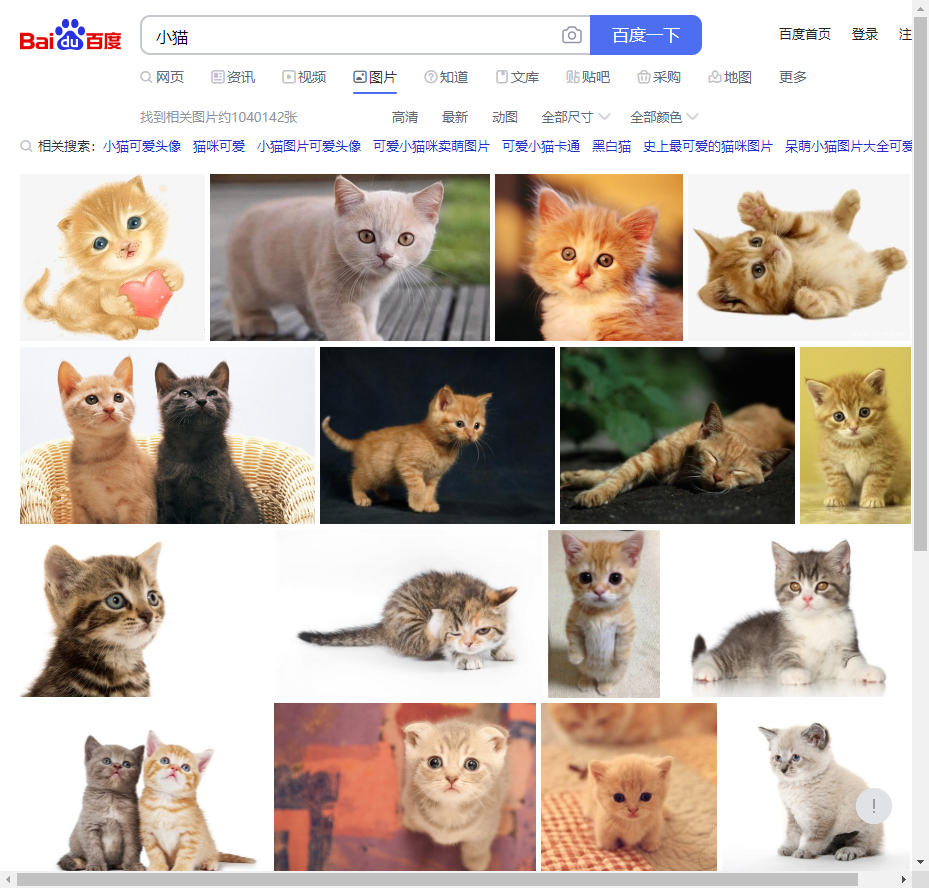

In [10]:
from IPython.display import Image, display
display(Image(chinese_png))

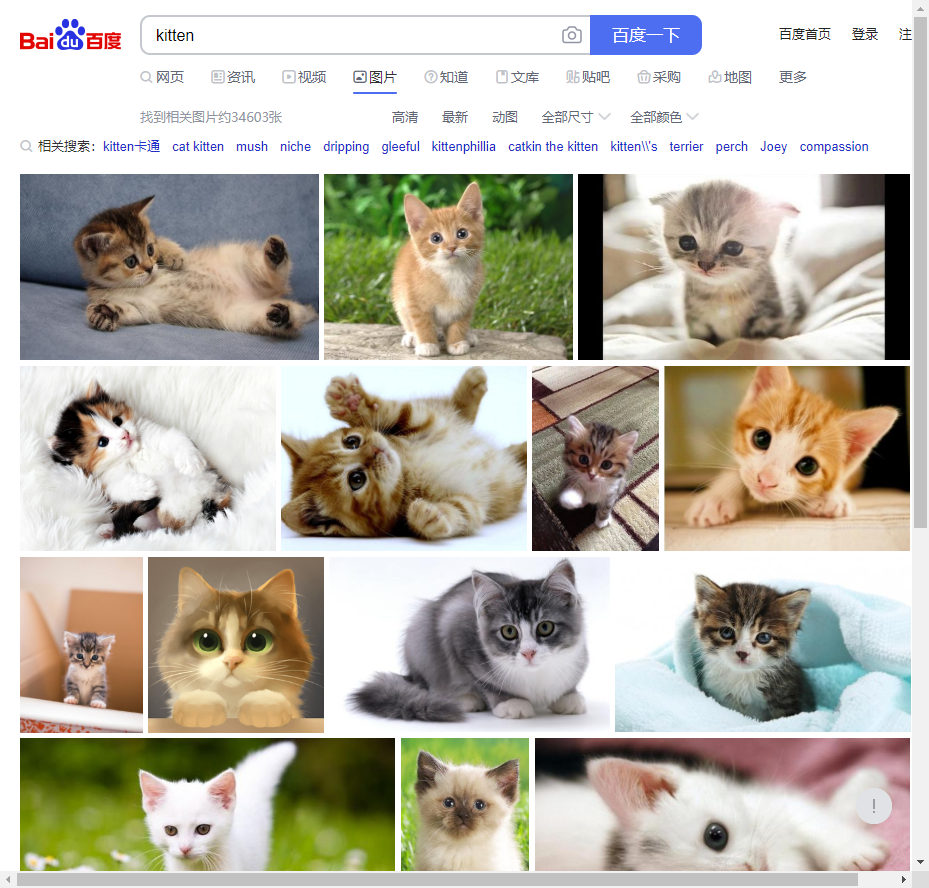

In [11]:
display(Image(english_png))

# Notes

As far as a first pass goes, this is fine, but taking screenshots is probably not going to do it for data collection. They're obfuscating the image sources, it might be possible to extract them but that's likely to be quite brittle. The easiest, best long-term solution might actually be to cut the images from the screenshot.